# FEMA Disaster Cost Forecasting
#### Capstone 2 - Exploratory Data Analysis
Michael Garber


#### EDA High-Level Steps
1. Build data profiles and tables
    2. Inferential statistics
3. Explore data relationships
    4. Data visualization
5. Feature Selection and Engineering

Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.

#### FEMA Disaster Cost Forecasting Goals
- predict/forecast/risk assess FEMA 2025 costs
- *dependent variable will be the sum of costs that each disaster records. To be defined in step three feature selection

#### Build data profiles and tables
###### Inferential statistics
- summary statistics
- categorical variable counts & review
- visualize/graph columns
- box plot analysis for outliers and anomolies

In [5]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
#Load cleaned data
femaDataClean = pd.read_csv('../data/interim/femaMasterData_clean.csv')

In [7]:
#display summary statistics table
femaDataClean.describe()

,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,totalObligatedAmountHmgp
count,4912.000000,4912.000000,4912.000000,4661.000000,4661.000000,4661.000000,4661.000000,4912.000000,4.912000e+03,4.912000e+03,4.912000e+03,4912.0,4912.0,4912.0,0.0,4.912000e+03
mean,2455.500000,2585.836116,6.030945,0.120360,0.301223,0.957305,0.671744,2023.894340,6.849449e+06,4.374681e+06,2.474768e+06,0.0,0.0,0.0,NaN,2.959833e+06
std,1418.116591,1591.571948,2.665469,0.325417,0.458839,0.202190,0.469629,24988.546468,9.360158e+07,6.603985e+07,3.036775e+07,0.0,0.0,0.0,NaN,3.569813e+07
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,0.000000e+00
25%,1227.750000,1229.750000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,0.000000e+00
50%,2455.500000,2460.500000,6.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,0.000000e+00
75%,3683.250000,4084.250000,9.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,2.247629e+05
max,4911.000000,5510.000000,10.000000,1.000000,1.000000,1.000000,1.000000,774691.000000,5.247169e+09,3.745182e+09,1.501987e+09,0.0,0.0,0.0,NaN,1.675656e+09


In [8]:
#categorical variable anaylsis
#disaster name
print(femaDataClean.disasterName.value_counts())

print("\n*Too many unique values, so this field is probably best not considered a categorical variable")

disasterName
SEVERE STORMS AND FLOODING                           299
SEVERE STORMS & FLOODING                             273
FLOODING                                             109
SEVERE WINTER STORM                                   96
COVID-19                                              83
                                                    ... 
OASIS PIPELINE FIRE                                    1
WAGGONER RANCH FIRE                                    1
SISK ROAD FIRE                                         1
SEVERE STORMS, TORNADOES, AND ASSOCIATED FLOODING      1
TORNADO & HEAVY RAINFALL                               1
Name: count, Length: 2345, dtype: int64

*Too many unique values, so this field is probably best not considered a categorical variable


declarationType
Major Disaster      2799
Fire Management     1046
Emergency            604
Fire Suppression     463
Name: count, dtype: int64


[Text(0.5, 1.0, 'Count of Declaration type')]

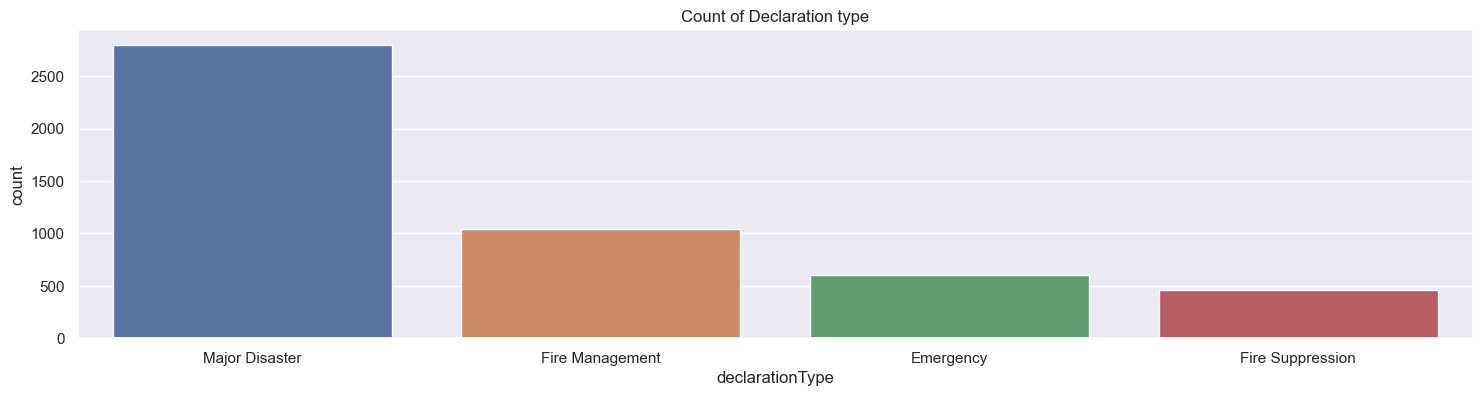

In [9]:
#categorical variable anaylsis
#declarationType
print(femaDataClean.declarationType.value_counts())

#count plot the states and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'declarationType', order=femaDataClean['declarationType'].value_counts().index).set(title='Count of Declaration type')

incidentType
Fire                 1606
Severe Storm         1080
Flood                 891
Hurricane             443
Tornado               182
Snowstorm             171
Biological            167
Severe Ice Storm       74
Typhoon                63
Drought                46
Earthquake             36
Other                  34
Coastal Storm          31
Freezing               18
Winter Storm           13
Mud/Landslide          12
Tropical Storm          9
Toxic Substances        8
Fishing Losses          6
Volcanic Eruption       6
Dam/Levee Break         6
Human Cause             4
Tsunami                 3
Terrorist               2
Chemical                1
Name: count, dtype: int64


[Text(0.5, 1.0, 'Count of Incident type')]

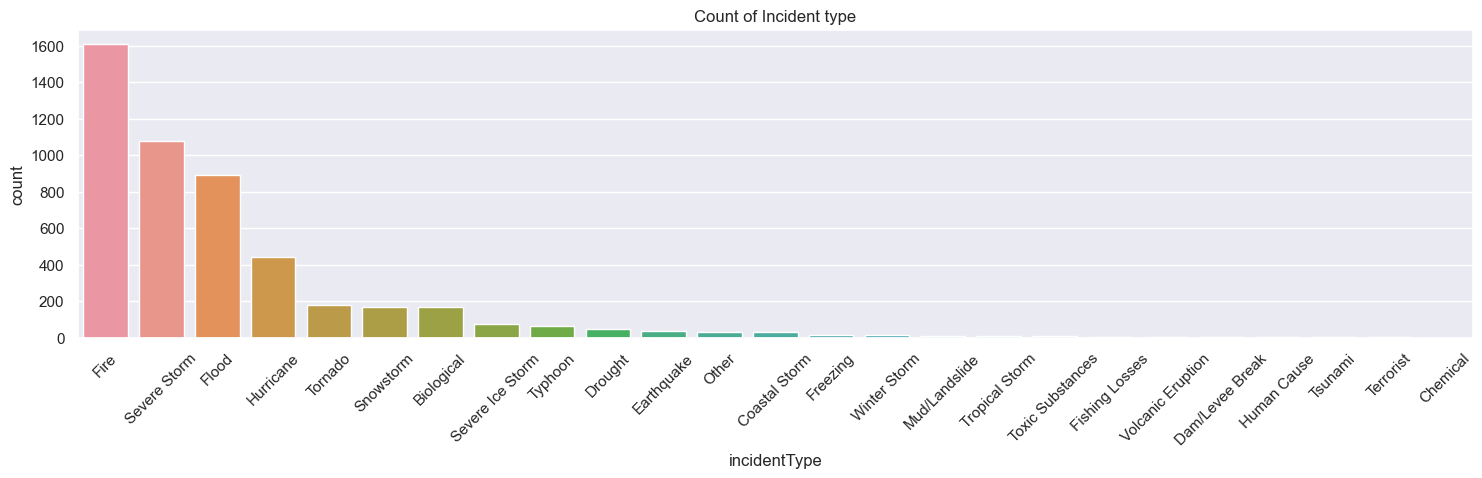

In [10]:
#categorical variable anaylsis
#incident type
print(femaDataClean.incidentType.value_counts())

#count plot the states and their # of disasters 
## define figure size
fig, ax = plt.subplots(figsize=(18, 4))
ax.tick_params(axis='x', labelrotation=45) #nice diagonal x-axis labels
sns.countplot(data = femaDataClean, x = 'incidentType', ax=ax, order=femaDataClean['incidentType'].value_counts().index).set(title='Count of Incident type')

region
6     911
9     763
4     742
10    491
8     459
5     356
1     320
7     320
3     301
2     249
Name: count, dtype: int64


[Text(0.5, 1.0, 'Disasters by FEMA Region #')]

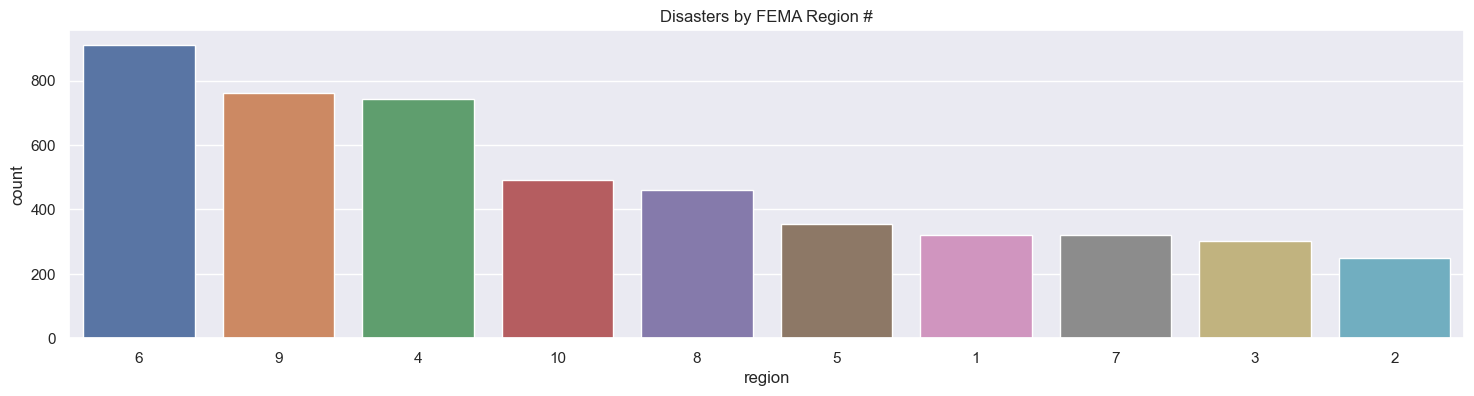

In [11]:
#categorical variable anaylsis
#region (geographic subdivided regious of the US and it's territories)
print(femaDataClean.region.value_counts())

#count plot the regions and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'region', order=femaDataClean['region'].value_counts().index).set(title='Disasters by FEMA Region #')

stateName
California                        377
Texas                             376
Oklahoma                          229
Washington                        204
Florida                           178
Oregon                            148
New Mexico                        117
Arizona                           115
New York                          112
Louisiana                         106
Nevada                            104
Montana                           103
Colorado                          102
Alabama                           101
Mississippi                        94
Tennessee                          91
South Dakota                       91
Kentucky                           89
Kansas                             86
Alaska                             83
Arkansas                           83
West Virginia                      80
Nebraska                           79
Minnesota                          79
Missouri                           78
Iowa                               77
No

[Text(0.5, 1.0, 'Disaster Count by State')]

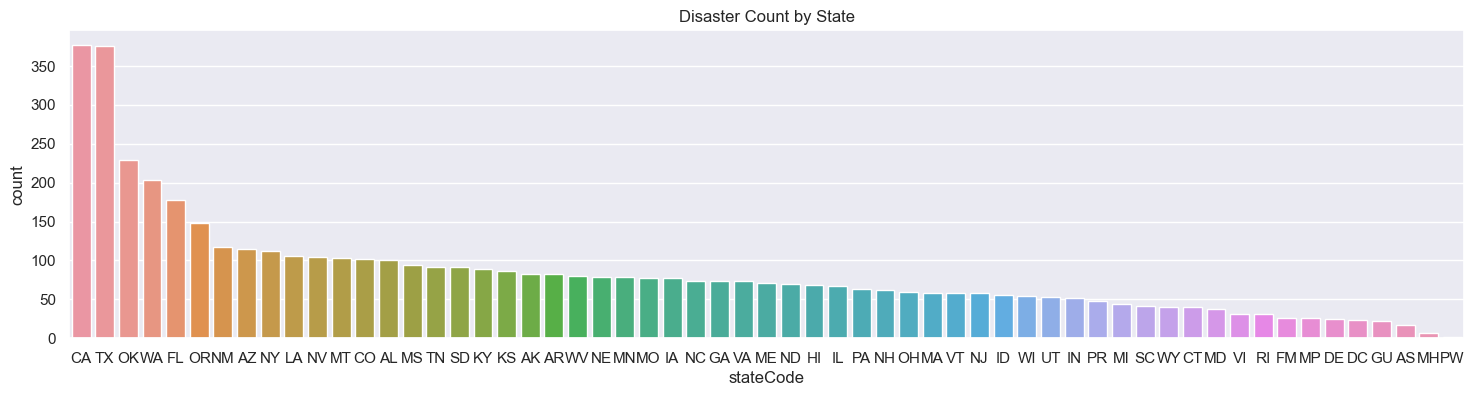

In [12]:
#categorical variable anaylsis
#state name
print(femaDataClean.stateName.value_counts())

#count plot the states and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'stateCode', order=femaDataClean['stateCode'].value_counts().index).set(title='Disaster Count by State')

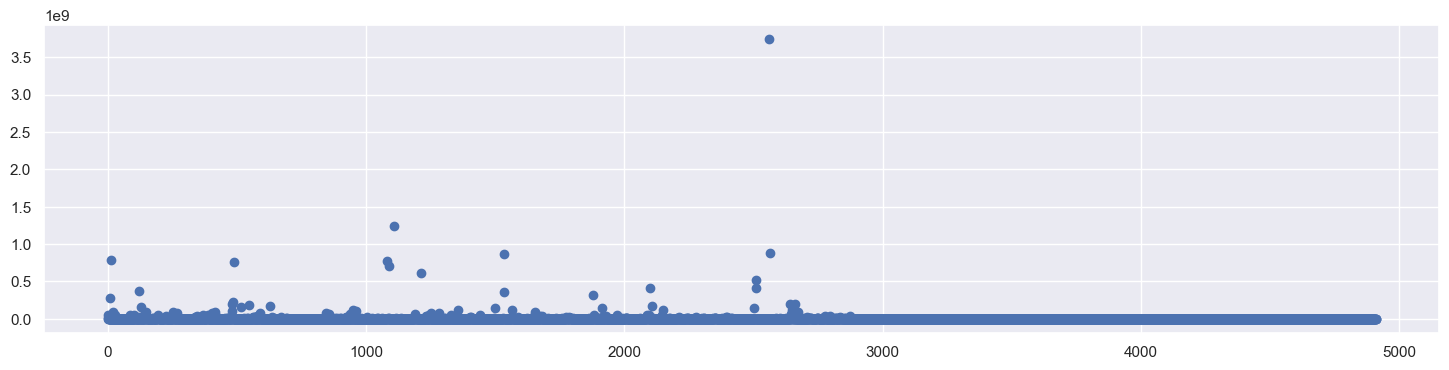

In [62]:
#boxplot the numeric (but non-categorical) columns
#sns.boxplot(data=femaDataClean, x=femaDataClean.ihProgramDeclared)

#sns.boxplot(data=femaDataClean, x=femaDataClean.iaProgramDeclared)
#sns.boxplot(data=femaDataClean, x=femaDataClean.paProgramDeclared)
#sns.boxplot(data=femaDataClean, x=femaDataClean.hmProgramDeclared)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalNumberIaApproved)
#plt.boxplot(femaDataClean.totalAmountIhpApproved)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalAmountHaApproved)
#plt.scatter(x=range(4912), y=femaDataClean.totalAmountHaApproved)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalAmountOnaApproved)
#sns.boxplot(data=femaDataClean, x=femaDataClean.totalObligatedAmountHmgp)

#print(femaDataClean['totalAmountHaApproved'])




In [14]:
'''
ihProgramDeclared
iaProgramDeclared
paProgramDeclared
hmProgramDeclared
totalNumberIaApproved
totalAmountIhpApproved
totalAmountHaApproved
totalAmountOnaApproved
totalObligatedAmountHmgp
      
      
'''

'\nihProgramDeclared\niaProgramDeclared\npaProgramDeclared\nhmProgramDeclared\ntotalNumberIaApproved\ntotalAmountIhpApproved\ntotalAmountHaApproved\ntotalAmountOnaApproved\ntotalObligatedAmountHmgp\n      \n      \n'

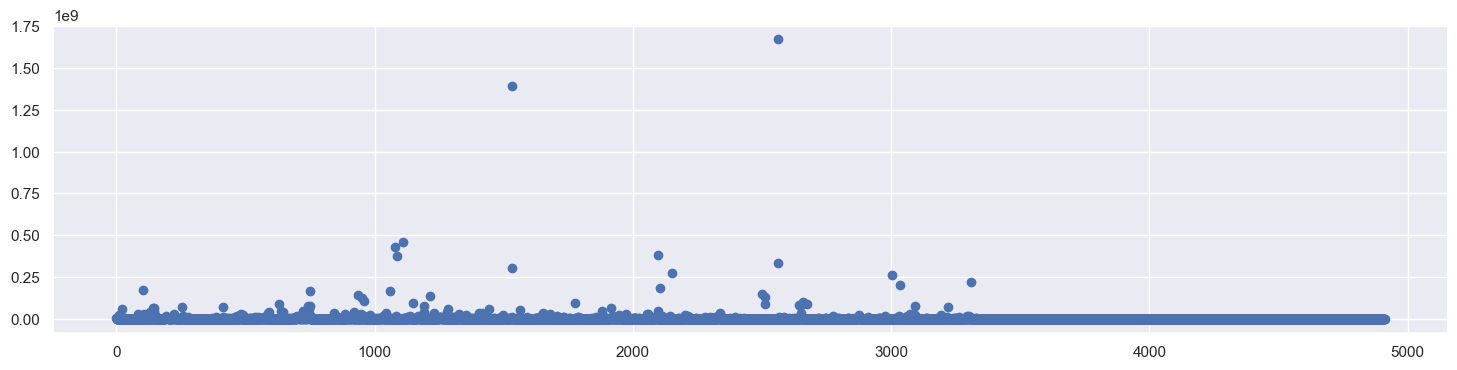

In [84]:
#col='totalObligatedAmountHmgp'
#plt.scatter(x=range(len(femaDataClean[col])), y=femaDataClean[col])


#### Explote Data Relationships
###### Data Visualizations
- correlation matrix
- heatmap
- https://datagy.io/python-correlation-matrix/

In [ ]:
#TO DO

'''
-limit the data based on date it was added so that each pull does not continually add more data
-more boxplots for outlier analysis
'''